# Retail Mart Data

### Data Dictionary

- Date:Transaction date
  
- Category: Product category(Electronics, Apparel, Home Goods)
 
- Region:Geographical region(North, South, East, West)

- Weather: Weather condition on the transaction day

- Advertising: Advertising spend on the given day ($)

- Discount: Percentage discount offered on products

- Sales: Total sales on the given day ($)

- Customer_Count: Number of customers on the given day

- Profit: Profit made on the given day ($)

- Month: Name of the month of the transaction

- Season: Season(Winter, Spring, Summer, Fall)

- Year: Year of the transaction

In [1]:
#Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
df=pd.read_csv(r"C:\Users\muham\Downloads\retailmart_data.csv")

In [3]:
#Understand the data
df.head()

,Date,Category,Region,Weather,Advertising,Discount,Month,Year,Season,Sales,Customer_Count,Profit
0,2022-01-01,Home Goods,East,Cloudy,1275.18,15.74,January,2022,Winter,2679.56,95,652.90
1,2022-01-02,Electronics,West,Cloudy,1893.89,24.74,January,2022,Winter,3859.05,147,924.16
2,2022-01-02,Apparel,East,Sunny,727.38,8.46,January,2022,Winter,2450.71,79,512.75
3,2022-01-02,Apparel,South,Rainy,1757.23,15.37,January,2022,Winter,3056.75,97,624.60
4,2022-01-05,Home Goods,North,Cloudy,1507.46,16.22,January,2022,Winter,2840.15,116,617.43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1000 non-null   object 
 1   Category        1000 non-null   object 
 2   Region          1000 non-null   object 
 3   Weather         1000 non-null   object 
 4   Advertising     1000 non-null   float64
 5   Discount        1000 non-null   float64
 6   Month           1000 non-null   object 
 7   Year            1000 non-null   int64  
 8   Season          1000 non-null   object 
 9   Sales           1000 non-null   float64
 10  Customer_Count  1000 non-null   int64  
 11  Profit          1000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 93.9+ KB


In [5]:
#Convert Date to Panda Datetime format
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1000 non-null   datetime64[ns]
 1   Category        1000 non-null   object        
 2   Region          1000 non-null   object        
 3   Weather         1000 non-null   object        
 4   Advertising     1000 non-null   float64       
 5   Discount        1000 non-null   float64       
 6   Month           1000 non-null   object        
 7   Year            1000 non-null   int64         
 8   Season          1000 non-null   object        
 9   Sales           1000 non-null   float64       
 10  Customer_Count  1000 non-null   int64         
 11  Profit          1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 93.9+ KB


In [7]:
#What range of date do we have in this data
df['Date'].min()

Timestamp('2022-01-01 00:00:00')

In [8]:
df['Date'].max()

Timestamp('2024-09-30 00:00:00')

In [9]:
#Sales Trend over time for various product categories
df['Category'].unique()

array(['Home Goods', 'Electronics', 'Apparel'], dtype=object)

In [10]:
df.head()

,Date,Category,Region,Weather,Advertising,Discount,Month,Year,Season,Sales,Customer_Count,Profit
0,2022-01-01,Home Goods,East,Cloudy,1275.18,15.74,January,2022,Winter,2679.56,95,652.90
1,2022-01-02,Electronics,West,Cloudy,1893.89,24.74,January,2022,Winter,3859.05,147,924.16
2,2022-01-02,Apparel,East,Sunny,727.38,8.46,January,2022,Winter,2450.71,79,512.75
3,2022-01-02,Apparel,South,Rainy,1757.23,15.37,January,2022,Winter,3056.75,97,624.60
4,2022-01-05,Home Goods,North,Cloudy,1507.46,16.22,January,2022,Winter,2840.15,116,617.43


In [11]:
#Filtering where the product category is home goods and other categories
home_goods=df[df['Category']=='Home Goods']
electronics=df[df['Category']=='Electronics']
Apparel=df[df['Category']=='Apparel']

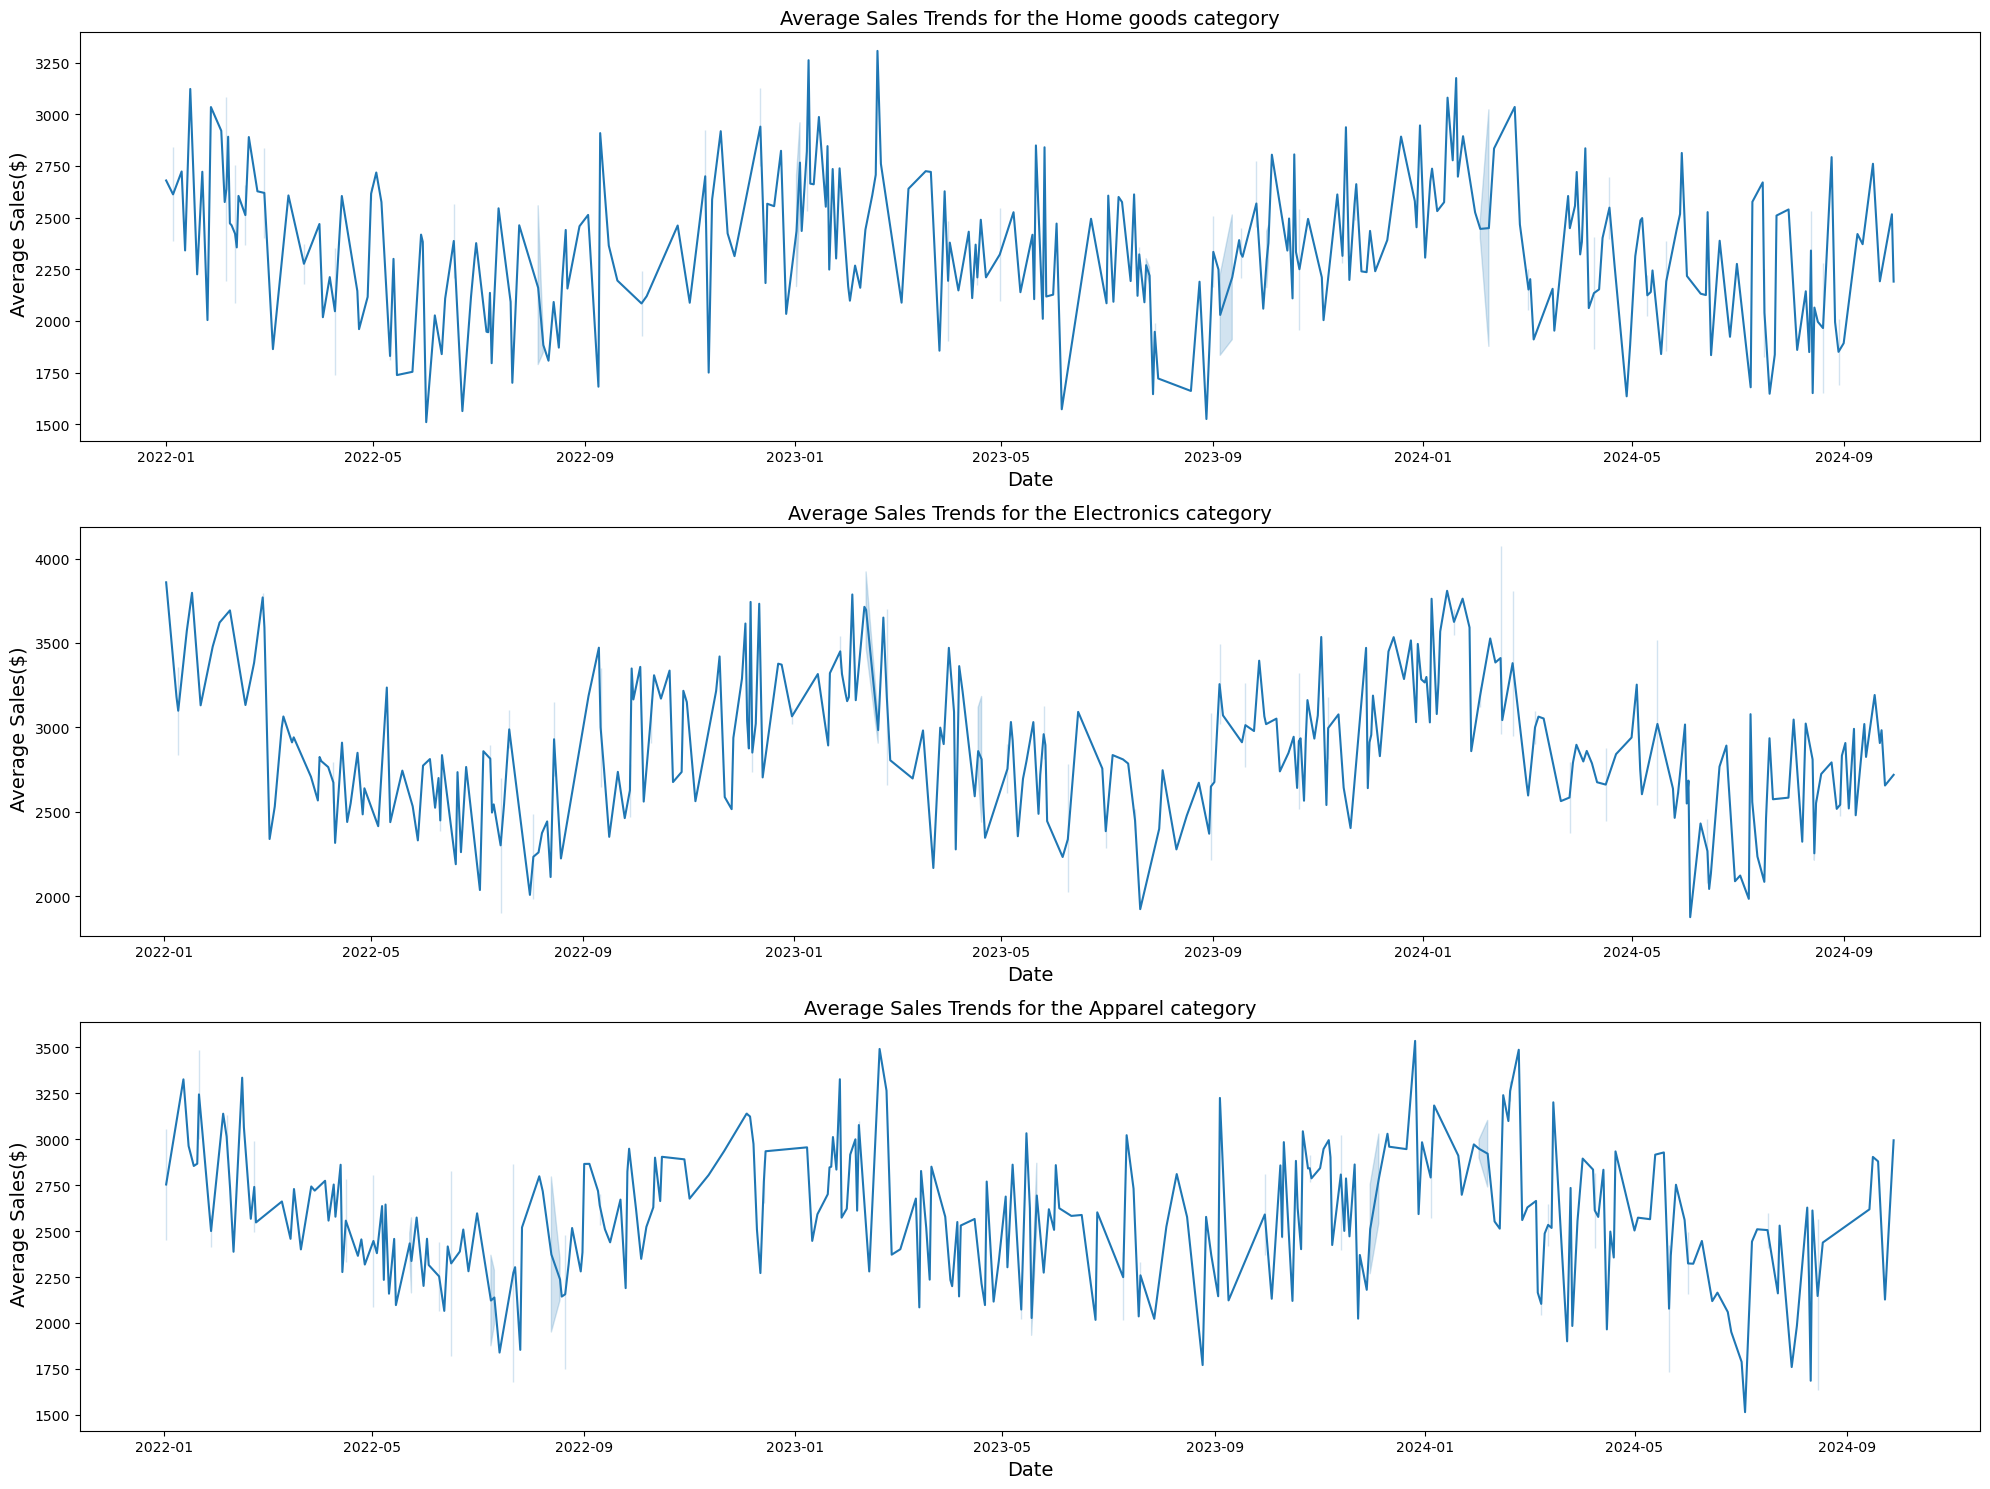

In [12]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(20,15))

sns.lineplot(x='Date',y='Sales',data=home_goods,ax=ax[0])
ax[0].set_title("Average Sales Trends for the Home goods category",fontsize=14)
ax[0].set_xlabel("Date",fontsize=14)
ax[0].set_ylabel(" Average Sales($)",fontsize=14)


sns.lineplot(x='Date',y='Sales',data=electronics,ax=ax[1])
ax[1].set_title("Average Sales Trends for the Electronics category",fontsize=14)
ax[1].set_xlabel("Date",fontsize=14)
ax[1].set_ylabel(" Average Sales($)",fontsize=14)

sns.lineplot(x='Date',y='Sales',data=Apparel,ax=ax[2])
ax[2].set_title("Average Sales Trends for the Apparel category",fontsize=14)
ax[2].set_xlabel("Date",fontsize=14)
ax[2].set_ylabel(" Average Sales($)",fontsize=14)

plt.tight_layout()
plt.show()

>Inisghts:Seasonal spikes are visible during holiday months(January through December) and slight dips in summer months

### Let's visualize seasonality across monthly sales

In [13]:
df['Year_Month']=df['Date'].dt.to_period("M").astype(str)

In [14]:
df.head()

,Date,Category,Region,Weather,Advertising,Discount,Month,Year,Season,Sales,Customer_Count,Profit,Year_Month
0,2022-01-01,Home Goods,East,Cloudy,1275.18,15.74,January,2022,Winter,2679.56,95,652.90,2022-01
1,2022-01-02,Electronics,West,Cloudy,1893.89,24.74,January,2022,Winter,3859.05,147,924.16,2022-01
2,2022-01-02,Apparel,East,Sunny,727.38,8.46,January,2022,Winter,2450.71,79,512.75,2022-01
3,2022-01-02,Apparel,South,Rainy,1757.23,15.37,January,2022,Winter,3056.75,97,624.60,2022-01
4,2022-01-05,Home Goods,North,Cloudy,1507.46,16.22,January,2022,Winter,2840.15,116,617.43,2022-01


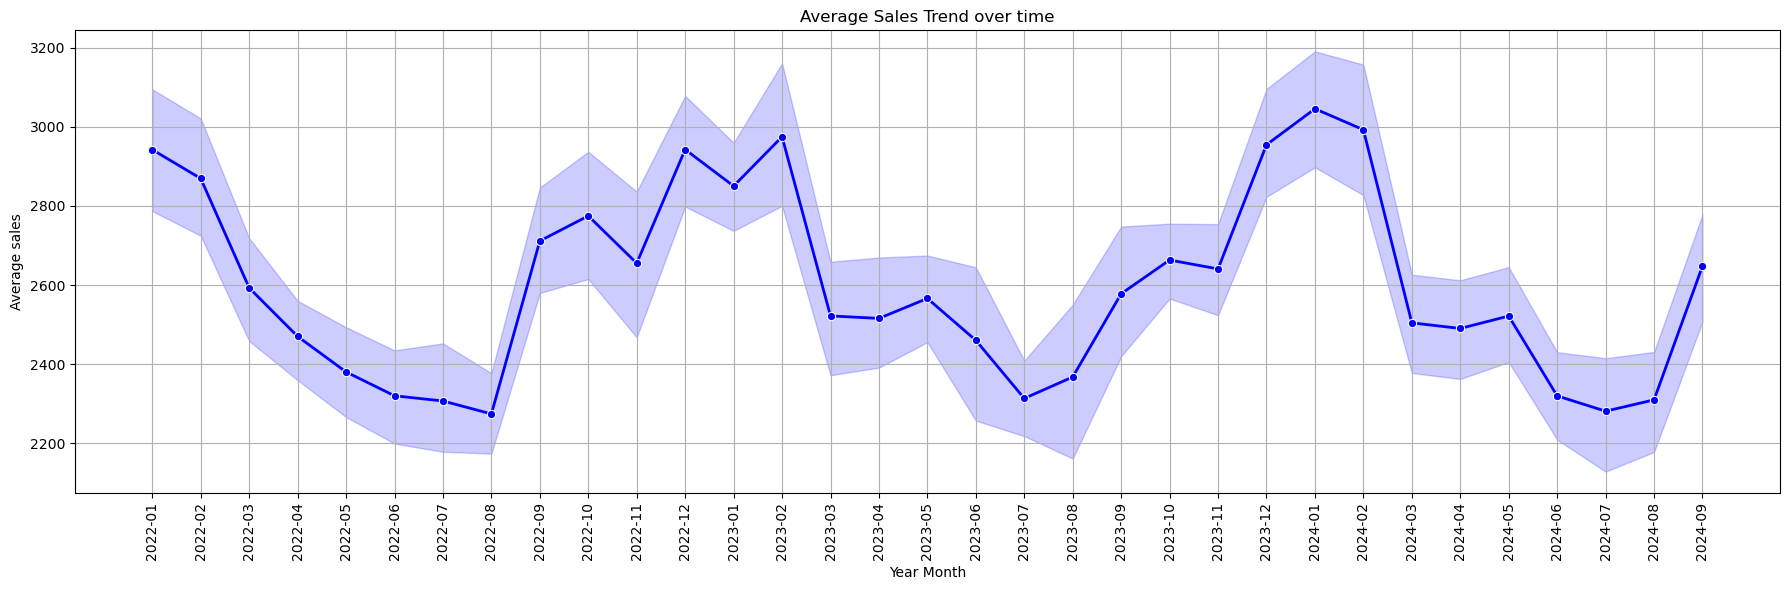

In [15]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Year_Month',y='Sales',data=df,color='blue',marker='o',linewidth=2)
plt.title("Average Sales Trend over time")
plt.xlabel("Year Month")
plt.ylabel("Average sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

>Insight:Indeed seasonality appears in data,sales are up around thee holiday seasons(from september to December) and dips during summer

### Let's confirm the trend by plotting average monthly trends across different seasons

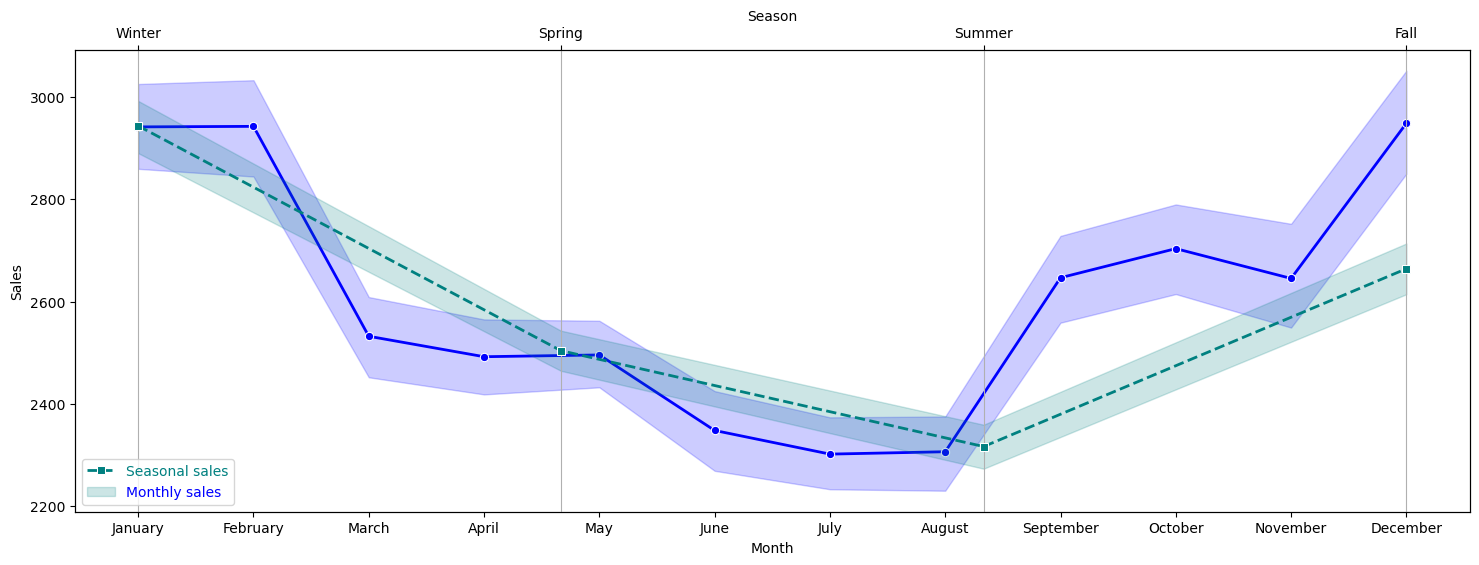

In [38]:
fig,ax=plt.subplots(figsize=(18,6))
sns.lineplot(x='Month',y='Sales',data=df,color='blue',marker='o',linewidth=2)
ax2=ax.twiny()
sns.lineplot(x='Season',y='Sales',data=df,color='teal',marker='s',linewidth=2,linestyle='--')
plt.legend(labels=['Seasonal sales','Monthly sales'],loc='lower left',labelcolor=['teal','blue'])
plt.grid()
plt.show()

>The seasonality peak in Winter and fall and dips in spring and summer in sales is confirmed as suspected

### Customer Activity Analysis

In [16]:
# Monthly Customer Trend analysis

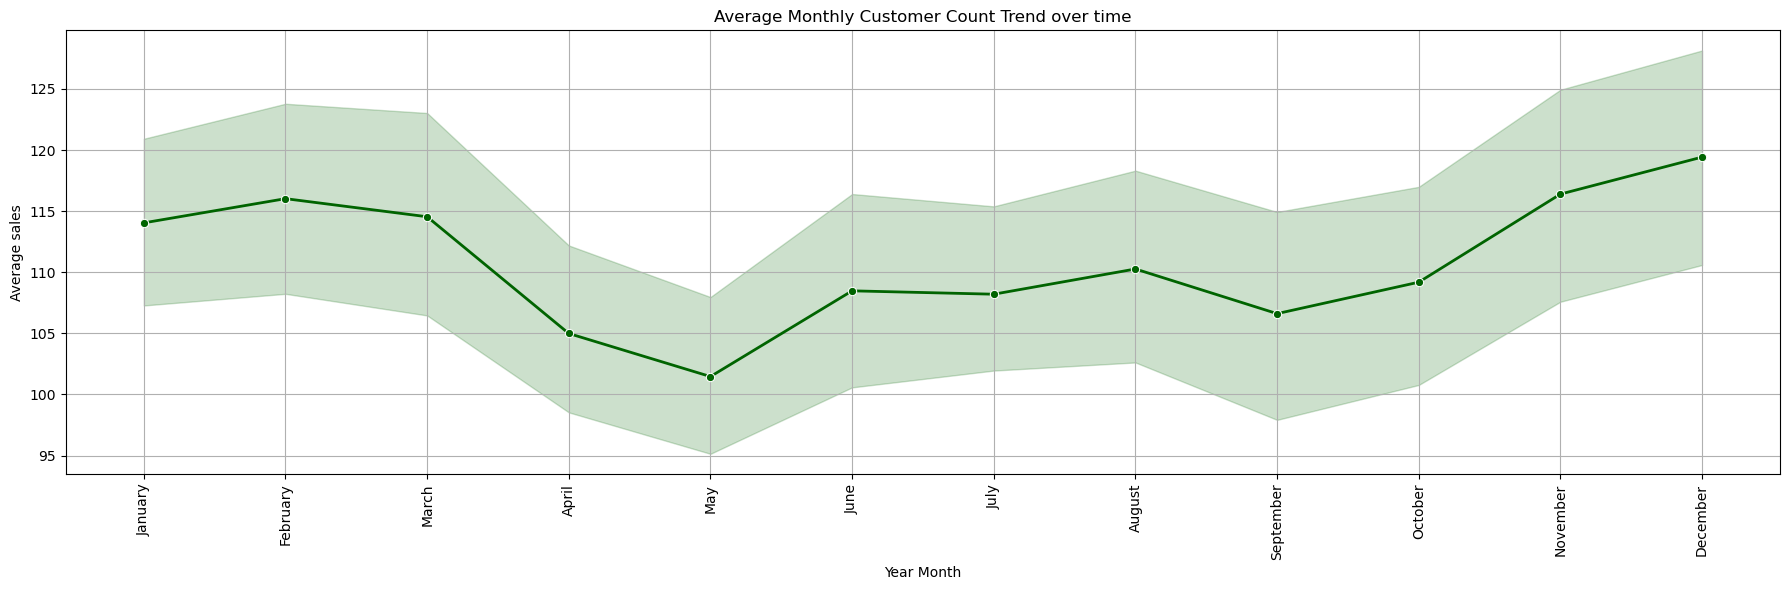

In [17]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Month',y='Customer_Count',data=df,color='darkgreen',marker='o',linewidth=2)
plt.title("Average Monthly Customer Count Trend over time")
plt.xlabel("Year Month")
plt.ylabel("Average sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

>Insights:Customer activity spikes during holiday season,aligning with sales trend

#### Let's see the same analysis over the entire timeline

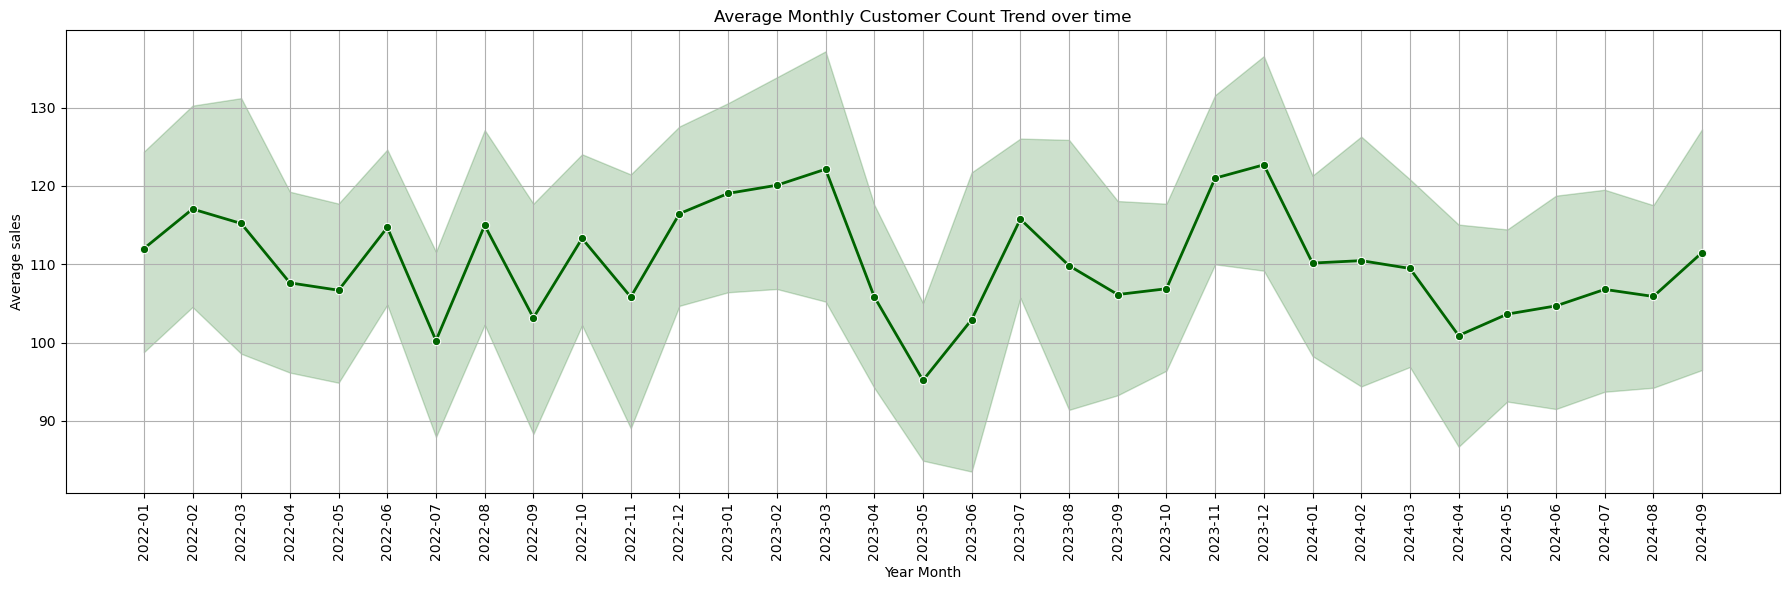

In [43]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Year_Month',y='Customer_Count',data=df,color='darkgreen',marker='o',linewidth=2)
plt.title("Average Monthly Customer Count Trend over time")
plt.xlabel("Year Month")
plt.ylabel("Average sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

>2023 holiday season had the most customer growth,meanwhile spring of the same year also had the highest dip in customer count

####  Advertising analysis

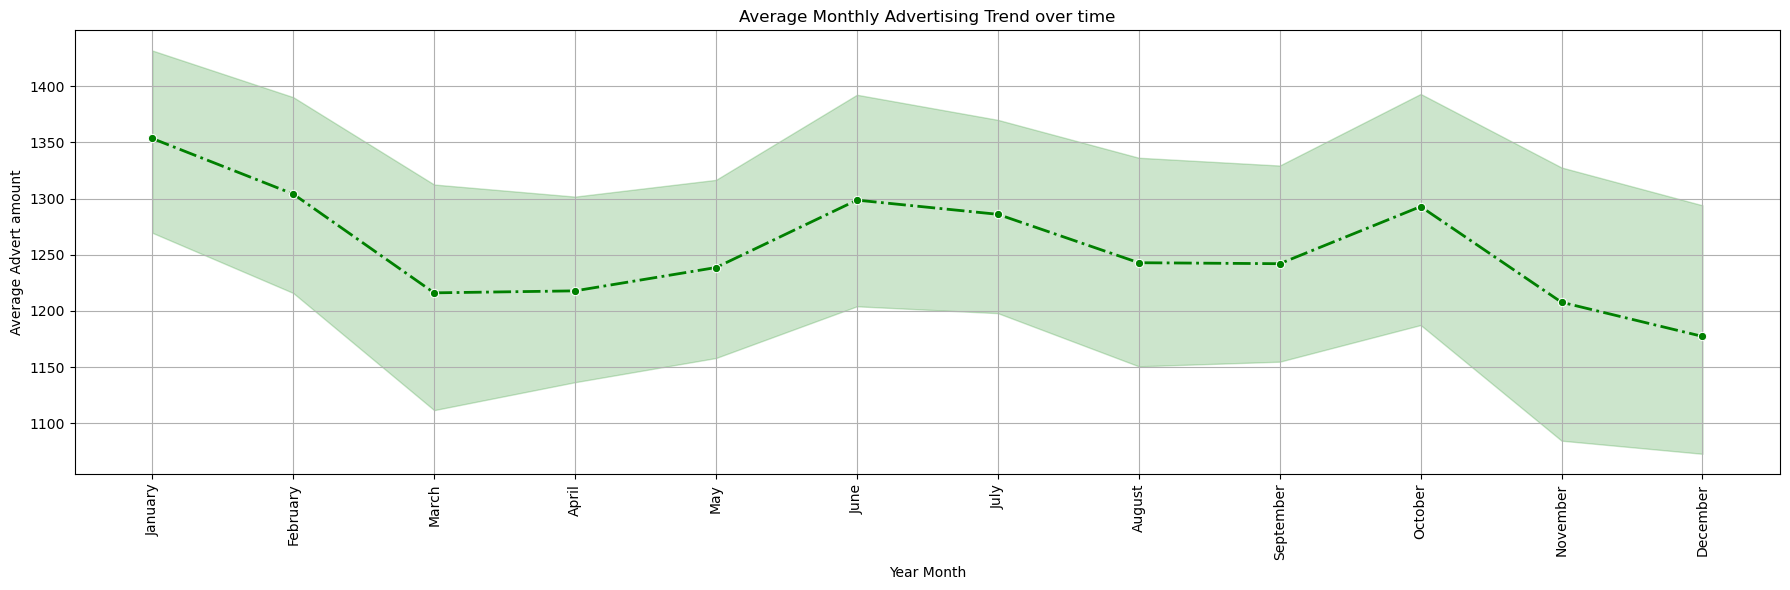

In [47]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Month',y='Advertising',data=df,color='green',marker='o',linewidth=2,linestyle='-.')
plt.title("Average Monthly Advertising Trend over time")
plt.xlabel("Year Month")
plt.ylabel("Average Advert amount")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

>Reduction in Advertisement budgets during the holiday when sales is expected to peak normally

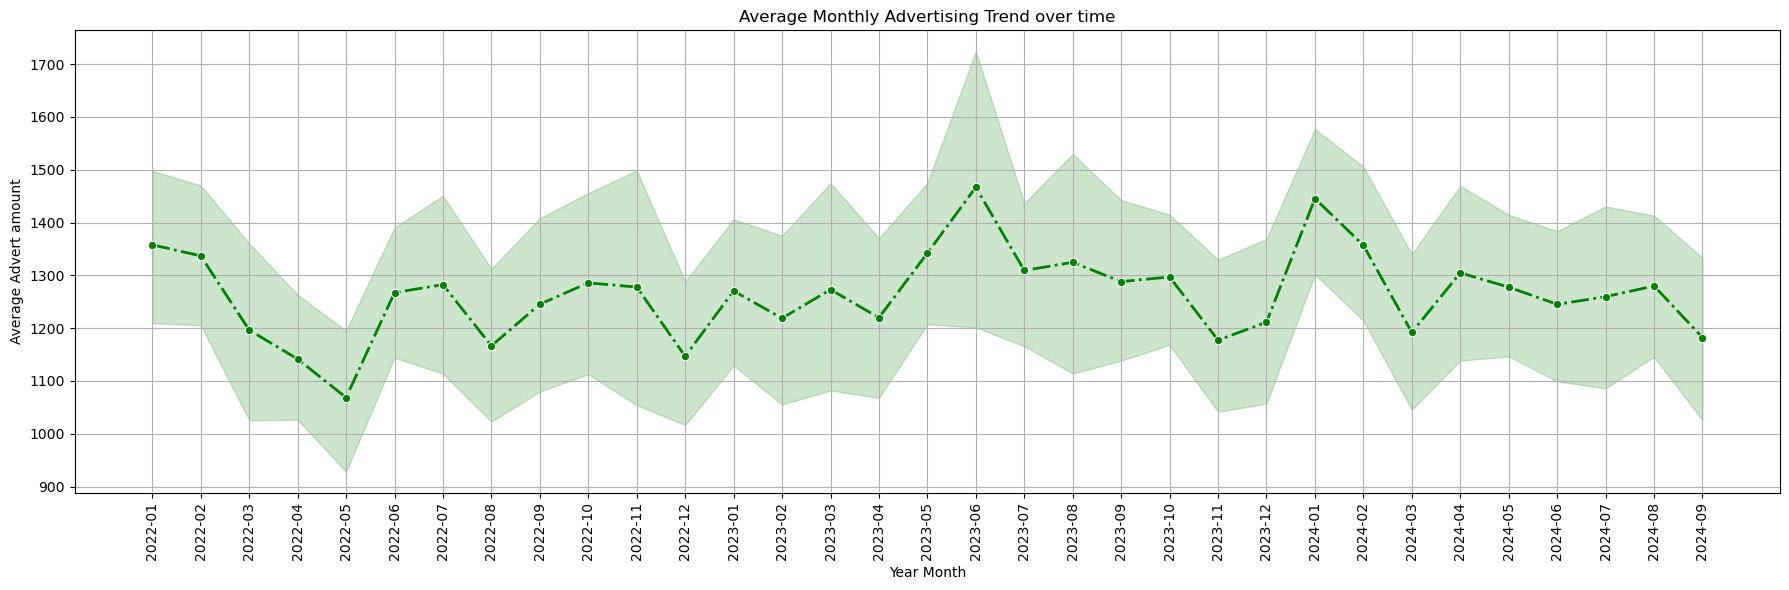

In [48]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Year_Month',y='Advertising',data=df,color='green',marker='o',linewidth=2,linestyle='-.')
plt.title("Average Monthly Advertising Trend over time")
plt.xlabel("Year Month")
plt.ylabel("Average Advert amount")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.show()

>The holiday season and spring of 2023 again has the largest budget for advertisement.As in previous chart,budget allocation for advertisement 
is expected to reduce during holiday season.However,the inverse is the case in 2023,probably due to the significant drop in customer activity that same year

#### Average Advertising and Sales over time

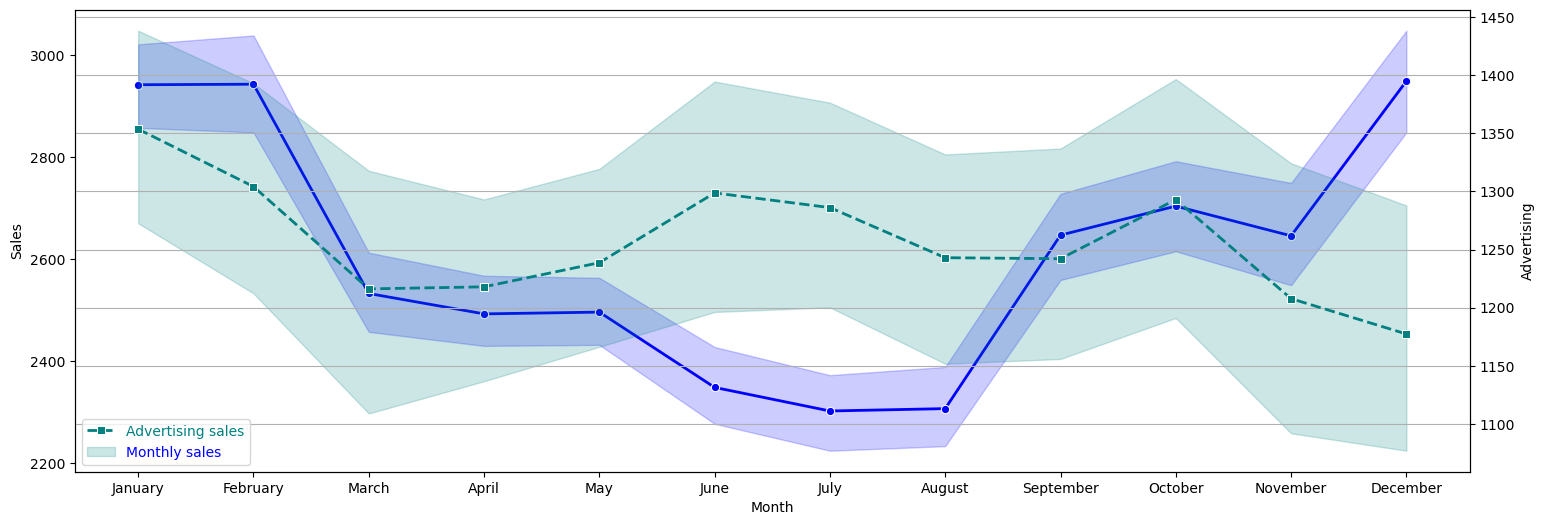

In [19]:
fig,ax=plt.subplots(figsize=(18,6))
sns.lineplot(x='Month',y='Sales',data=df,color='blue',marker='o',linewidth=2)
ax2=ax.twinx()
sns.lineplot(x='Month',y='Advertising',data=df,color='teal',marker='s',linewidth=2,linestyle='--')
plt.legend(labels=['Advertising sales','Monthly sales'],loc='lower left',labelcolor=['teal','blue'])
plt.grid()
plt.show()

>Sales activities spikes during the holiday seasons,opposing advertisement trends

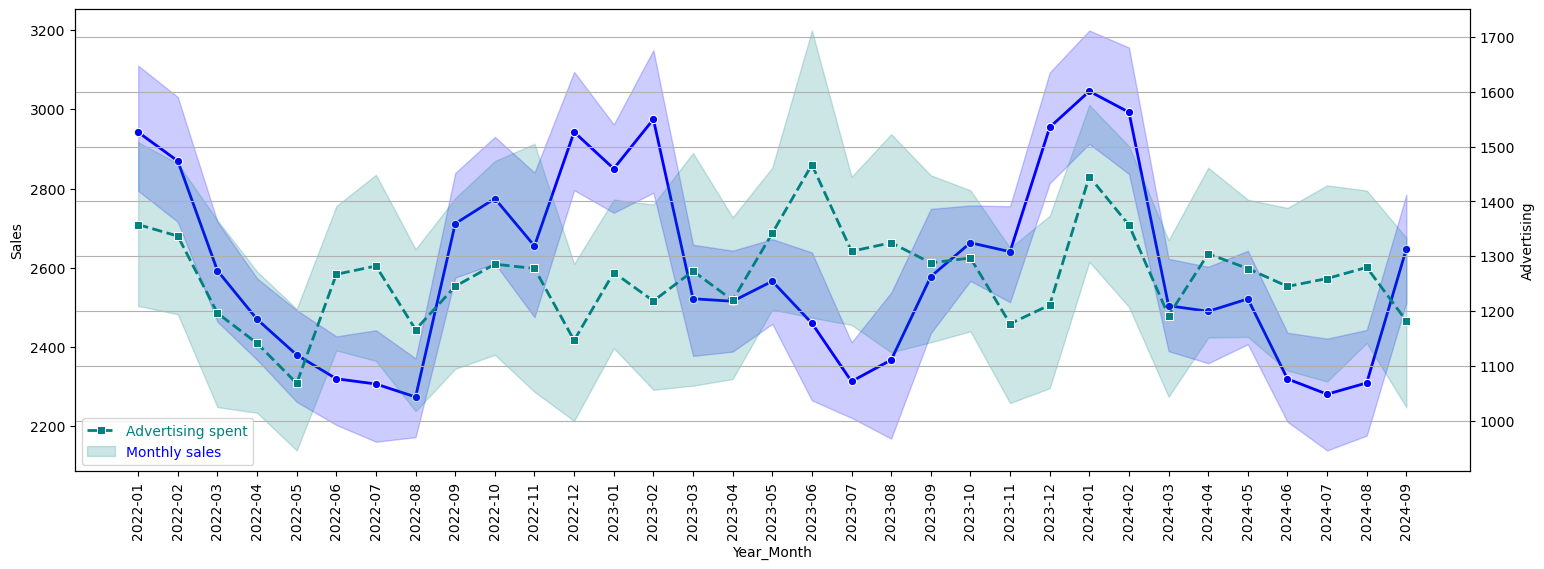

In [58]:
fig,ax=plt.subplots(figsize=(18,6))
sns.lineplot(x='Year_Month',y='Sales',data=df,color='blue',marker='o',linewidth=2)
plt.xticks(rotation=90)
ax2=ax.twinx()
sns.lineplot(x='Year_Month',y='Advertising',data=df,color='teal',marker='s',linewidth=2,linestyle='--')
plt.legend(labels=['Advertising spent','Monthly sales'],loc='lower left',labelcolor=['teal','blue'])
plt.grid()
plt.show()

>A confirmation on the effect of advertisement budget during the 2023 spring downward fall of customer activities and sales.The increase in budget allocation that year not only revive the sales but also pushed it to an all-time high

#### Discount Analysis over time

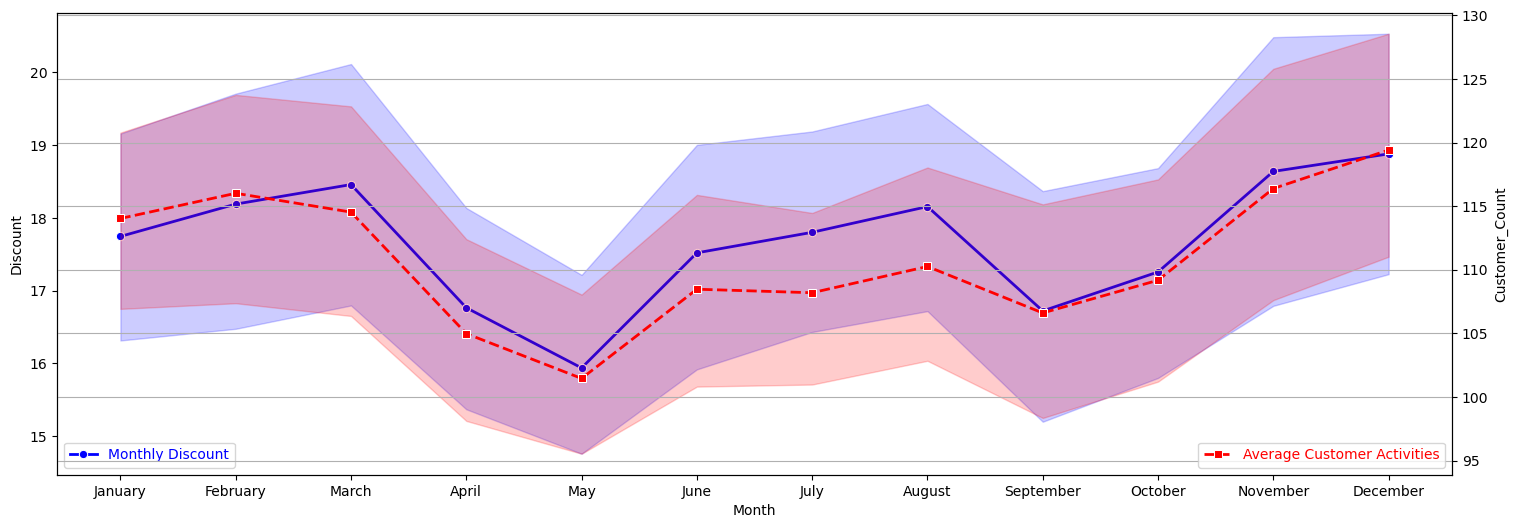

In [62]:
#Does discount attract more customers?
fig,ax=plt.subplots(figsize=(18,6))
sns.lineplot(x='Month',y='Discount',data=df,color='blue',marker='o',linewidth=2,ax=ax)
ax.legend(labels=['Monthly Discount'],loc='lower left',labelcolor='blue')

ax2=ax.twinx()
sns.lineplot(x='Month',y='Customer_Count',data=df,color='red',marker='s',linewidth=2,linestyle='--')
ax2.legend(labels=['Average Customer Activities'],loc='lower right',labelcolor='red')
plt.grid()
plt.show()

>Indeed Higher discounts attracts more customers

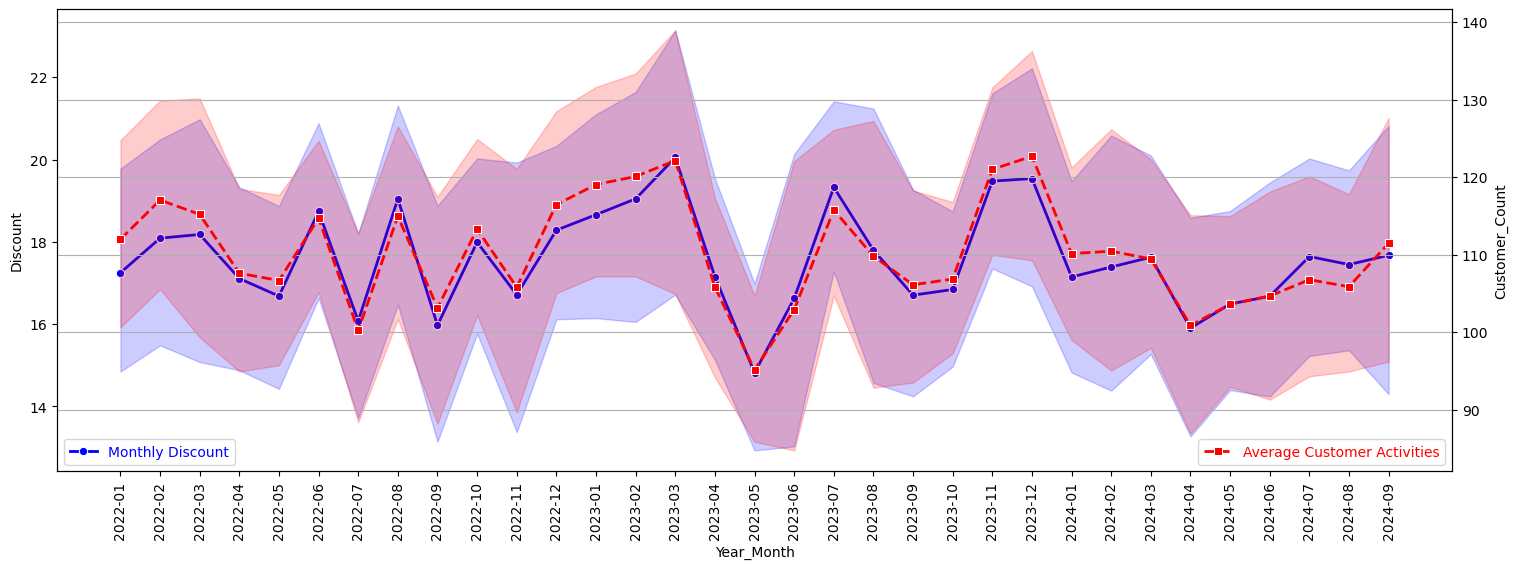

In [64]:
fig,ax=plt.subplots(figsize=(18,6))
sns.lineplot(x='Year_Month',y='Discount',data=df,color='blue',marker='o',linewidth=2,ax=ax)
ax.legend(labels=['Monthly Discount'],loc='lower left',labelcolor='blue')
plt.xticks(rotation=90)
ax2=ax.twinx()
sns.lineplot(x='Year_Month',y='Customer_Count',data=df,color='red',marker='s',linewidth=2,linestyle='--')
ax2.legend(labels=['Average Customer Activities'],loc='lower right',labelcolor='red')
plt.grid()
plt.show()

>The same trends continues throughout the year i.e higher discounts,more customers

### Numerical and categorical Analysis

In [20]:
df.columns

Index(['Date', 'Category', 'Region', 'Weather', 'Advertising', 'Discount',
       'Month', 'Year', 'Season', 'Sales', 'Customer_Count', 'Profit',
       'Year_Month'],
      dtype='object')

#### Average sales by the different regions

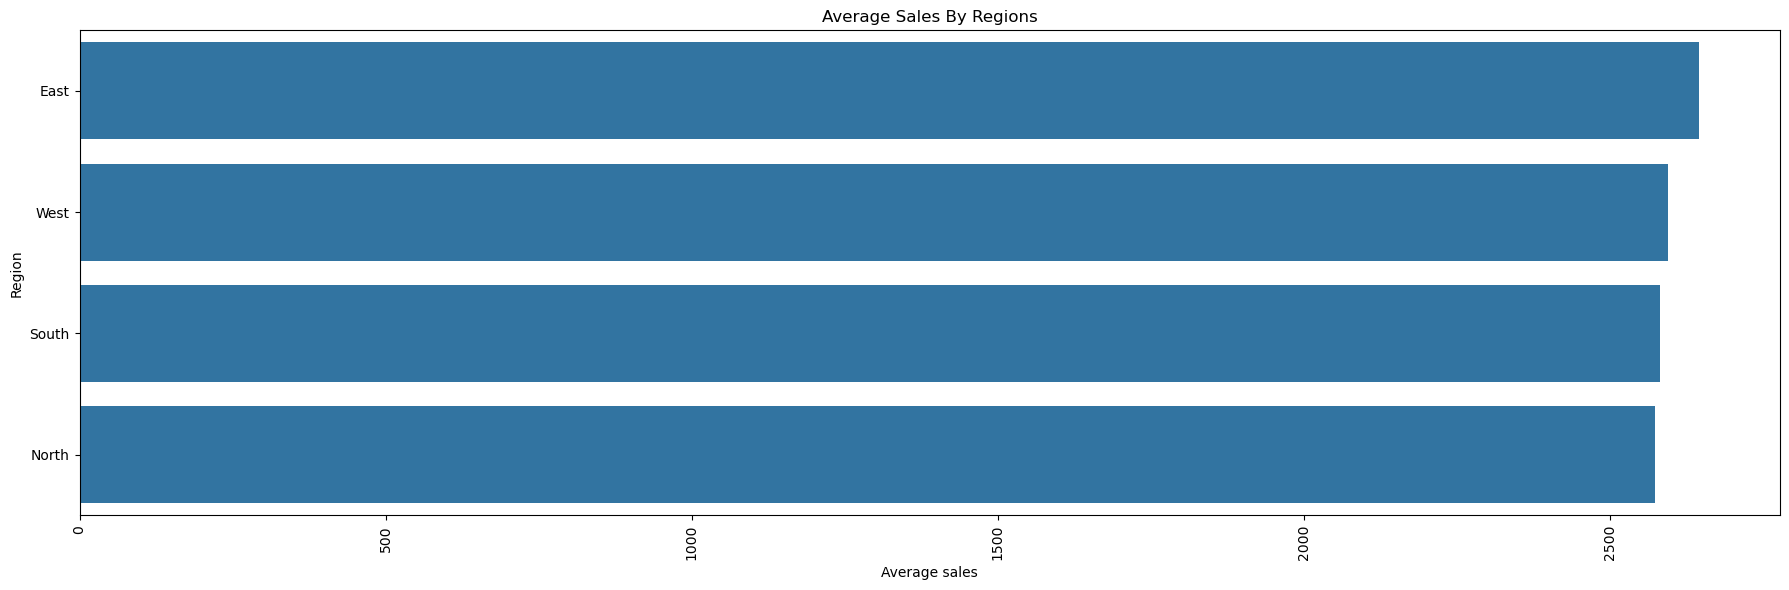

In [30]:
plt.figure(figsize=(18,6))
sns.barplot(x='Sales',y='Region',data=df,orient='h',errorbar=None)
plt.title("Average Sales By Regions")
plt.xlabel("Average sales")
plt.ylabel("Region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

>Insight:The Eastern Region outperforms others indicating potential region dominance

#### Average profits by the different regions

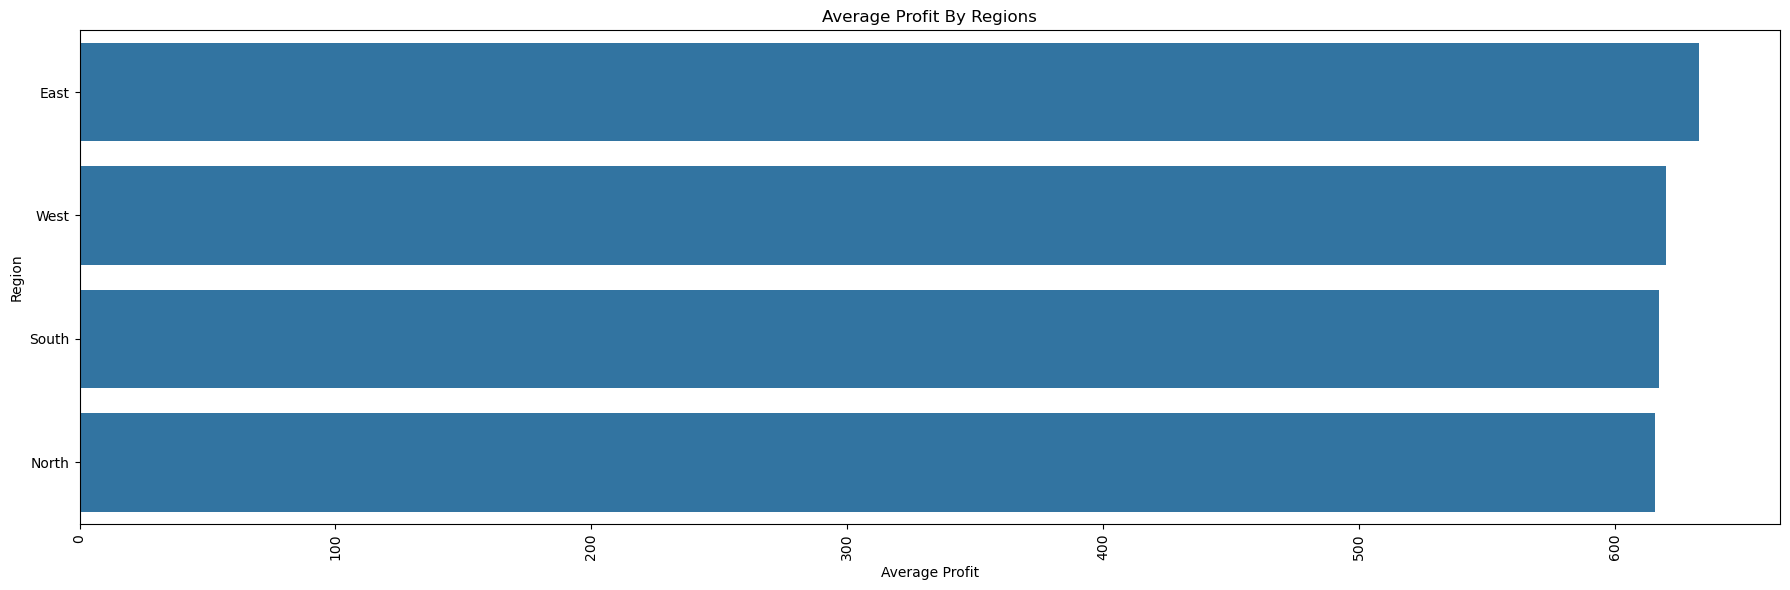

In [22]:
plt.figure(figsize=(18,6))
sns.barplot(x='Profit',y='Region',data=df,orient='h',errorbar=None)
plt.title("Average Profit By Regions")
plt.xlabel("Average Profit")
plt.ylabel("Region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

>Insight:The Eastern Region slightly outperforms the others

#### Average sales by the different category

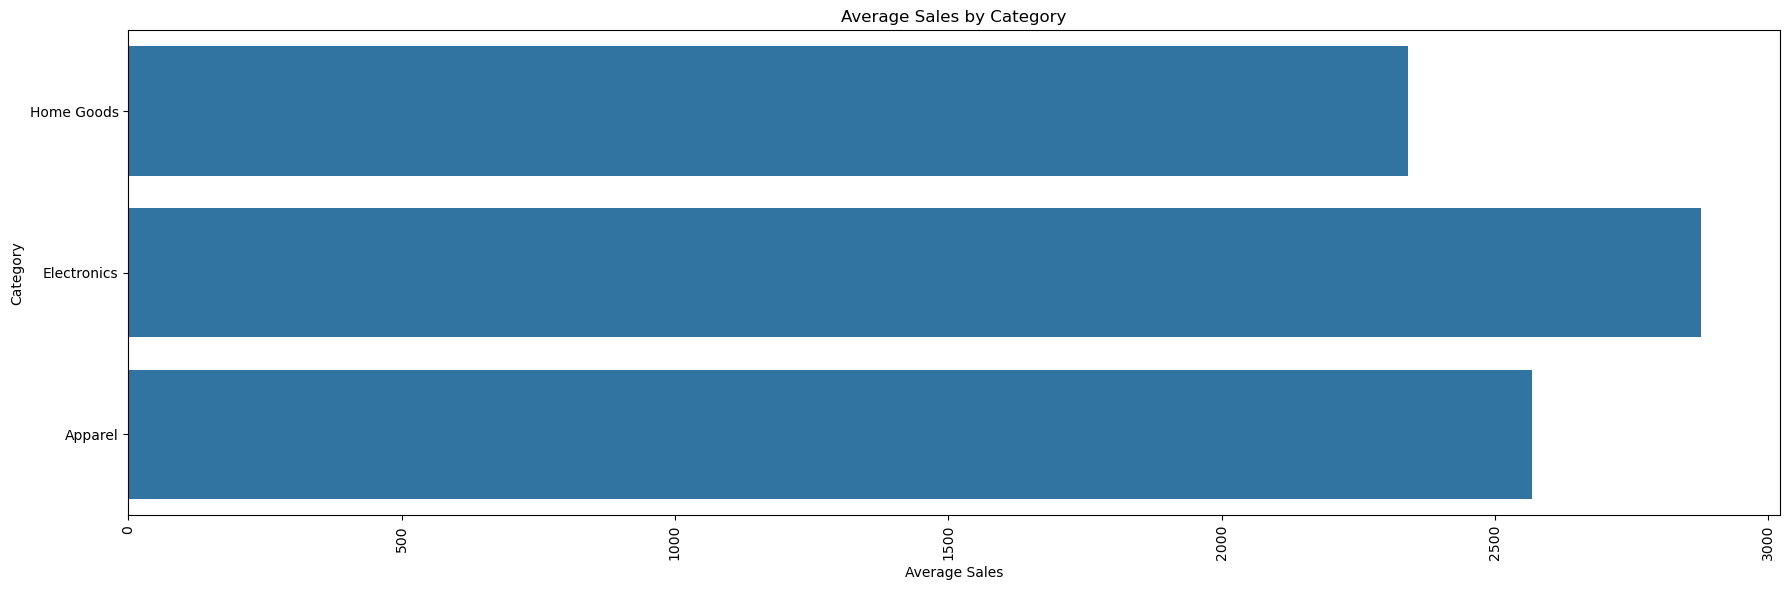

In [31]:
plt.figure(figsize=(18,6))
sns.barplot(x='Sales',y='Category',data=df,orient='h',errorbar=None)
plt.title("Average Sales by Category")
plt.xlabel("Average Sales")
plt.ylabel("Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

>Insights:Electronics leads in sales,while Home Goods performs relatively lower

#### Sales vs Profit

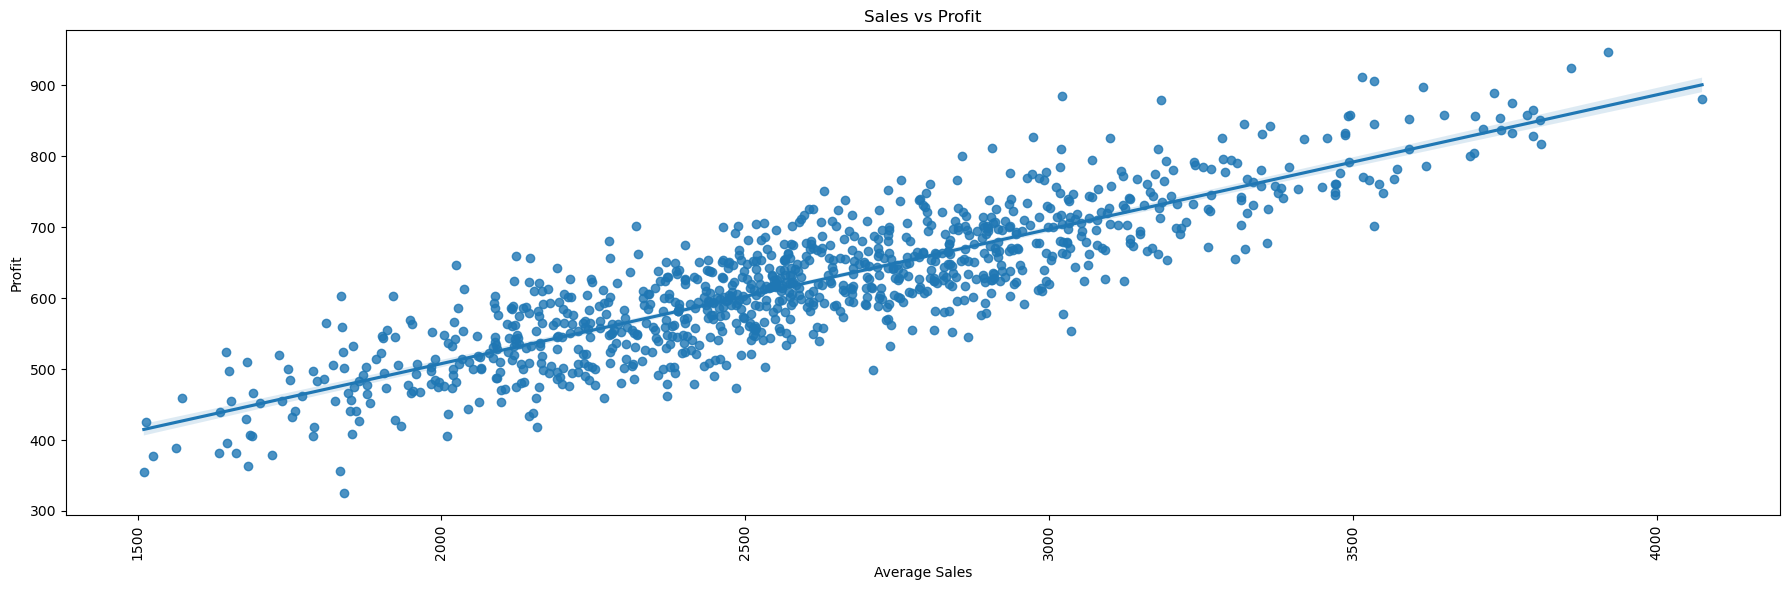

In [32]:
plt.figure(figsize=(18,6))
sns.regplot(x='Sales',y='Profit',data=df)
plt.title("Sales vs Profit")
plt.xlabel("Average Sales")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

>There is a positive correlation between sales and profit,the more the sales the more the profit

#### Sales VS Profit by Seasons

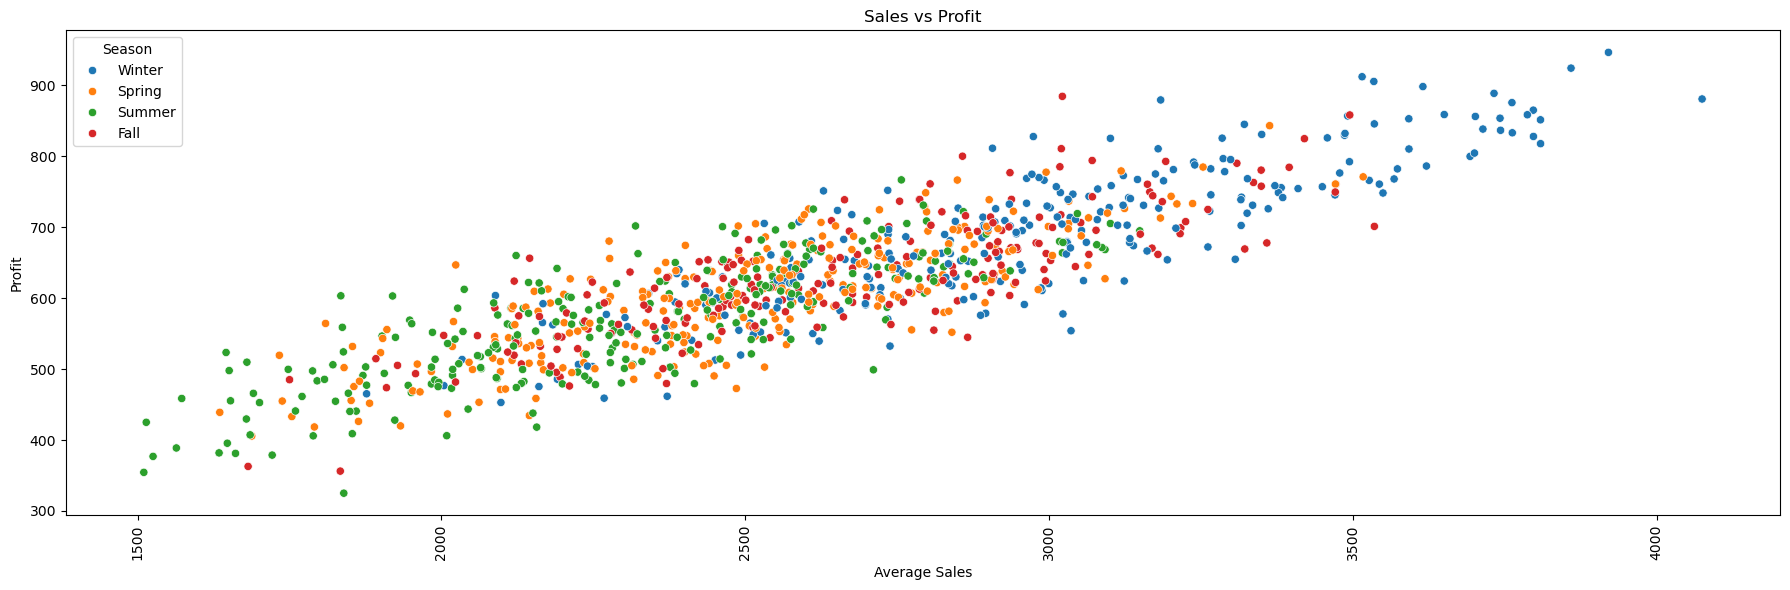

In [28]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='Sales',y='Profit',hue='Season',data=df)
plt.title("Sales vs Profit")
plt.xlabel("Average Sales")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

>Insights:Positive correlation exists between sales and Profits with clear seasonal variation.With winter being the most profitable season

#### Sales VS Profit by Categories

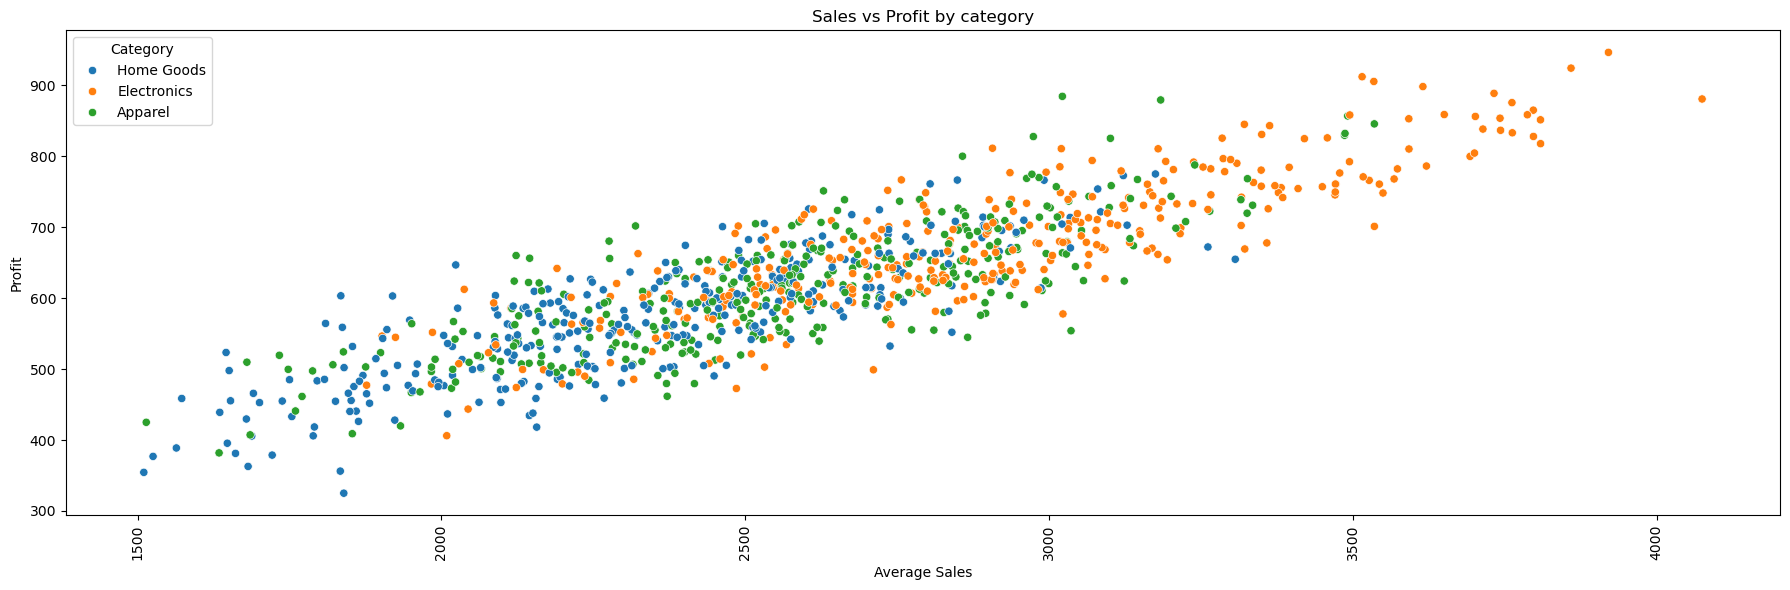

In [29]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='Sales',y='Profit',hue='Category',data=df)
plt.title("Sales vs Profit by category")
plt.xlabel("Average Sales")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

>From this scatter plot,the most profitable category is Electronics

#### Sales Vs profits by Regions

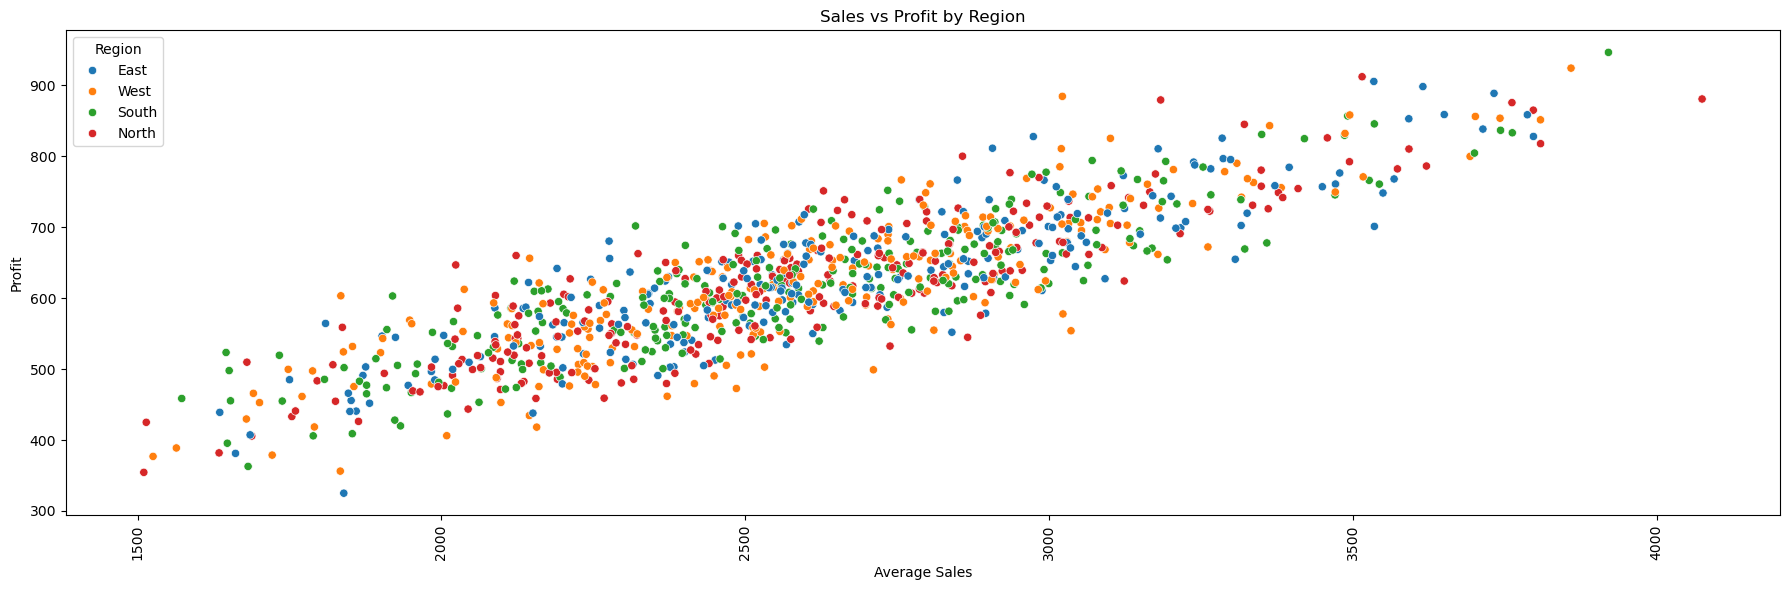

In [81]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='Sales',y='Profit',hue='Region',data=df)
plt.title("Sales vs Profit by Region")
plt.xlabel("Average Sales")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Sales and Profit by Category

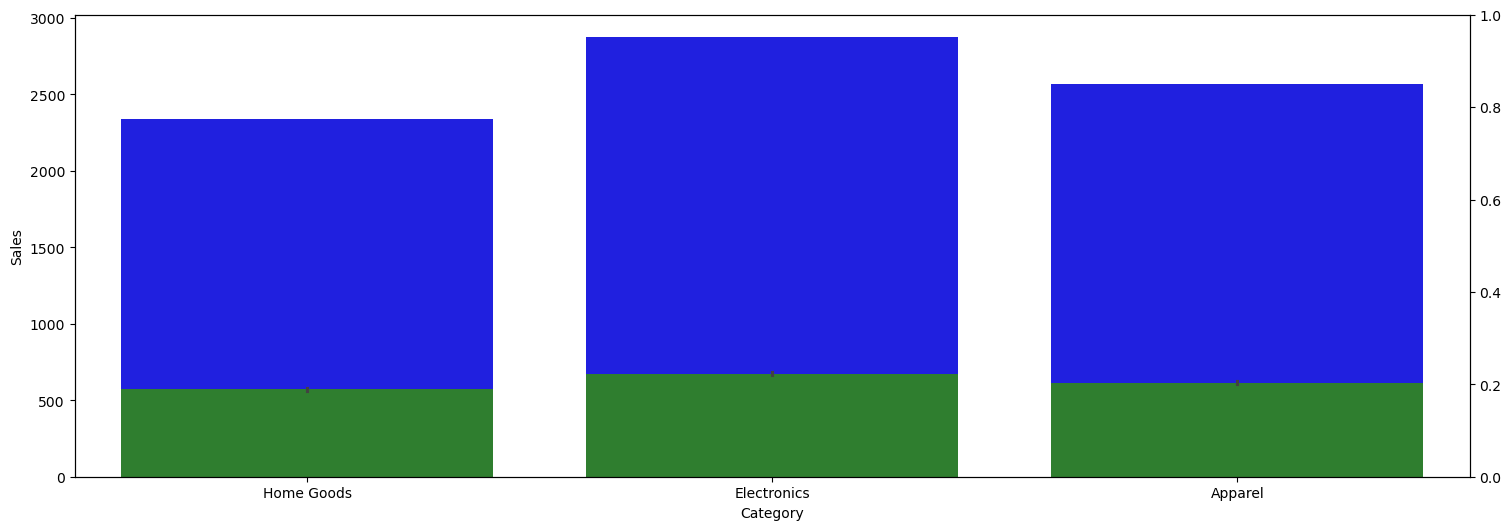

In [33]:
fig,ax=plt.subplots(figsize=(18,6))
sns.barplot(x='Category',y='Sales',data=df,color='blue',ax=ax,errorbar=None)

ax.twinx()
sns.barplot(x='Category',y='Profit',data=df,color='forestgreen',ax=ax)
plt.show()

>Reaffirms that the most profits is from electronics

#### Sales and Profit by Region

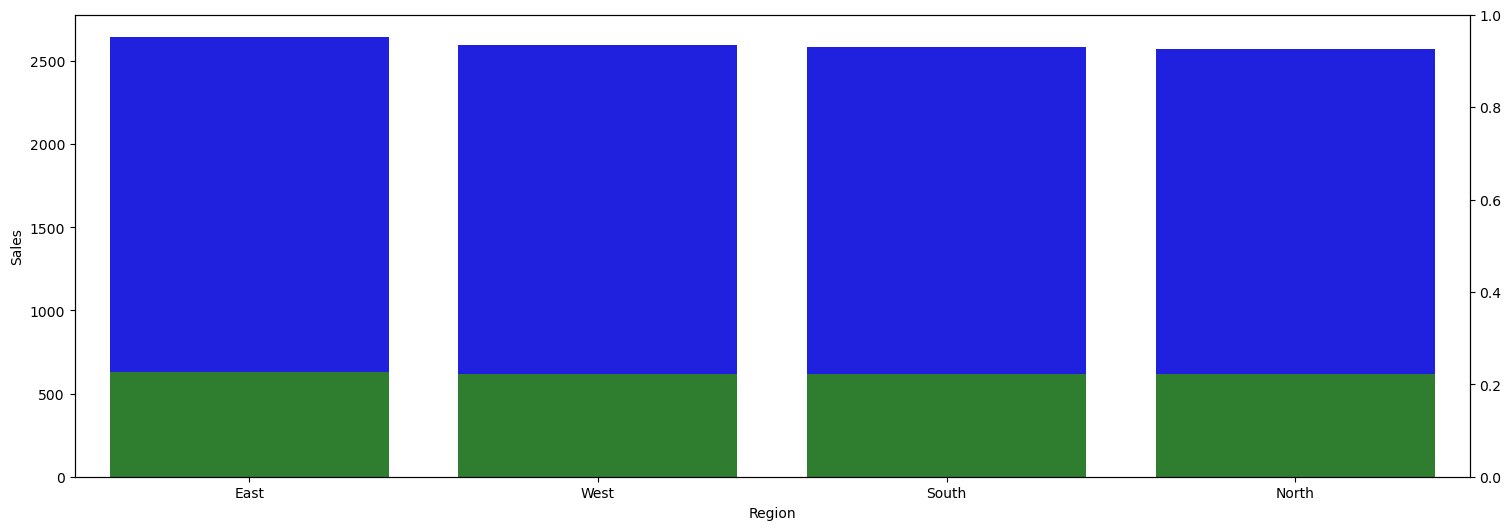

In [84]:
fig,ax=plt.subplots(figsize=(18,6))
sns.barplot(x='Region',y='Sales',data=df,color='blue',ax=ax,errorbar=None)

ax.twinx()
sns.barplot(x='Region',y='Profit',data=df,color='forestgreen',ax=ax,errorbar=None)
plt.show()

>Reaffirms what we discovered,East slightly outperforms other region

#### Advertising vs Sales

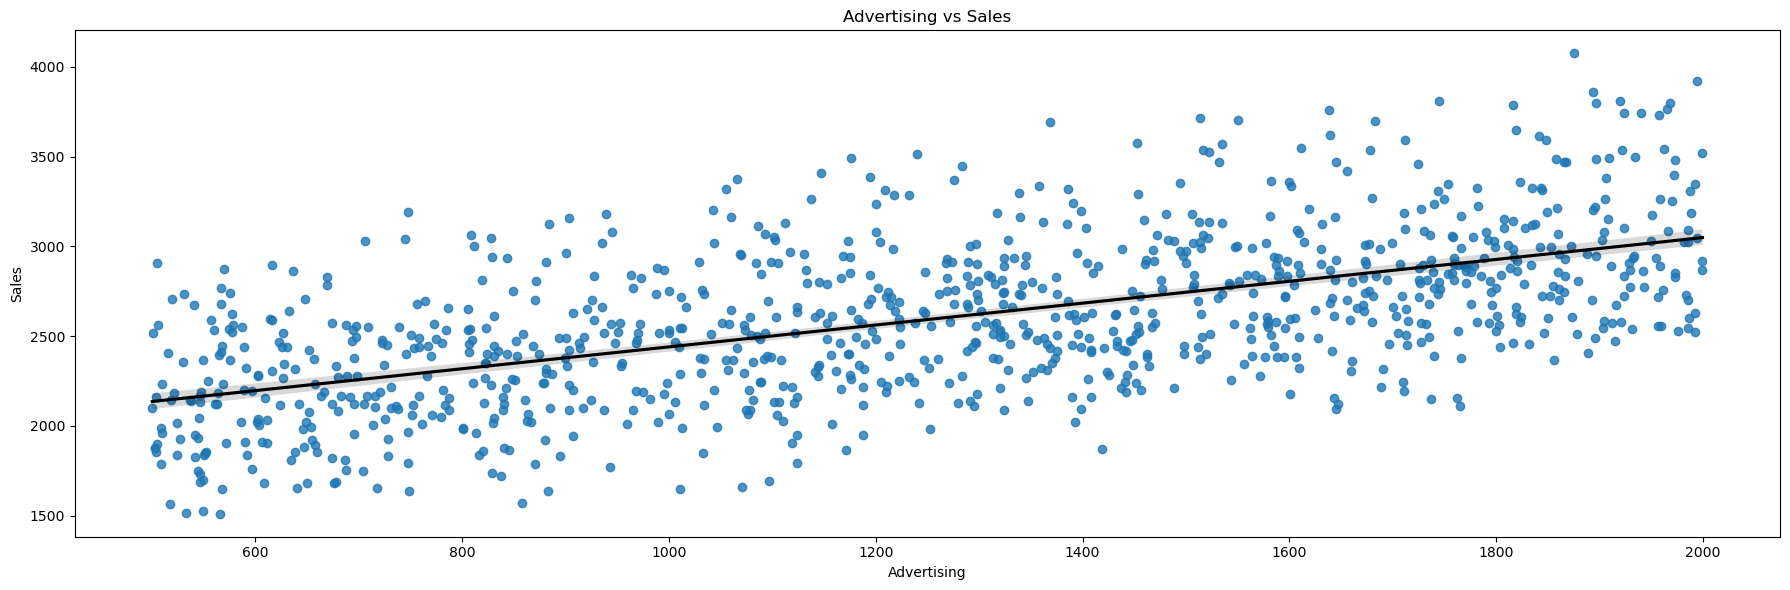

In [91]:
plt.figure(figsize=(18,6))
sns.regplot(x='Advertising',y='Sales',data=df,line_kws={'color':'black'})
plt.title("Advertising vs Sales")
plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

>Higher Advertising leads to higher sales

#### Discount impact on customer patronage

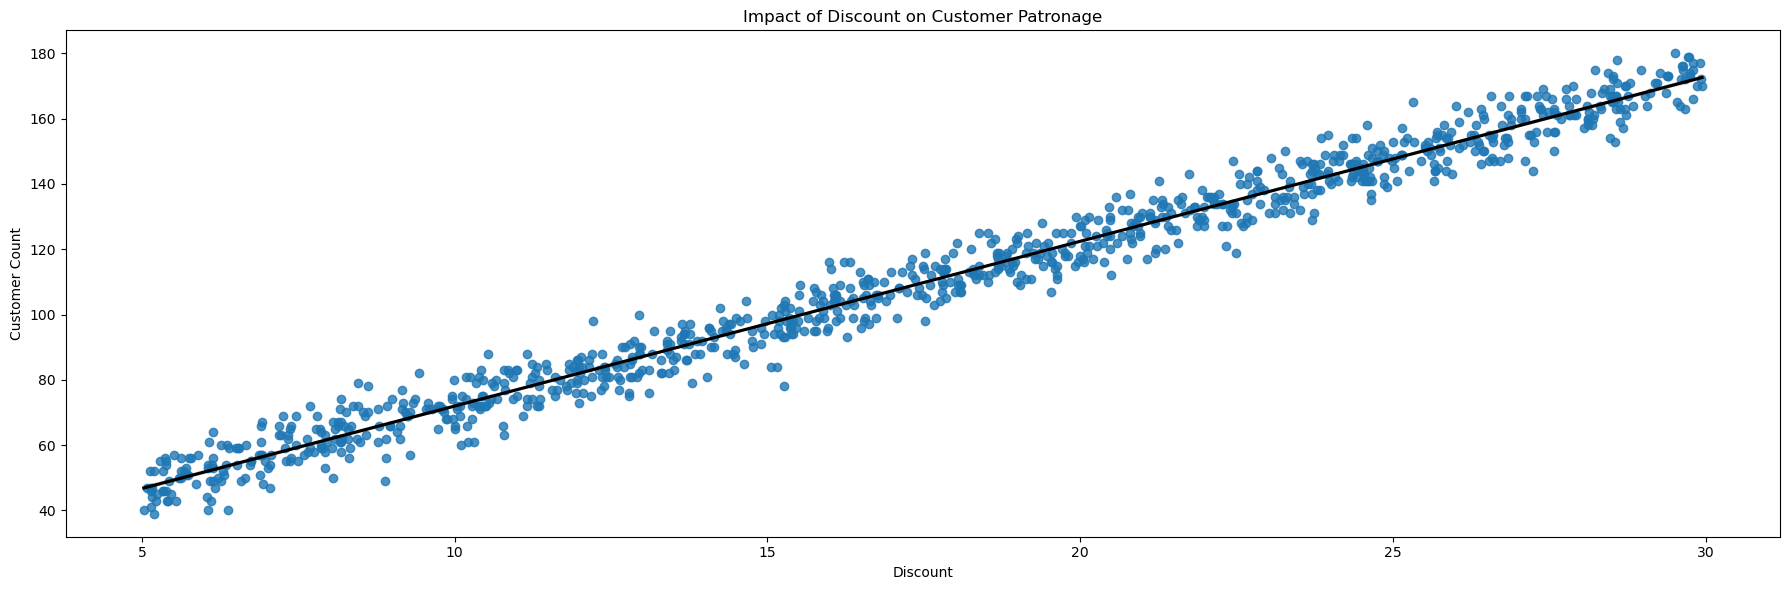

In [92]:
plt.figure(figsize=(18,6))
sns.regplot(x='Discount',y='Customer_Count',data=df,line_kws={'color':'black'})
plt.title("Impact of Discount on Customer Patronage")
plt.xlabel("Discount")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()

>Higher discounts leads to higher patronage from both old and new  

#### Seasonal Sales Distribution

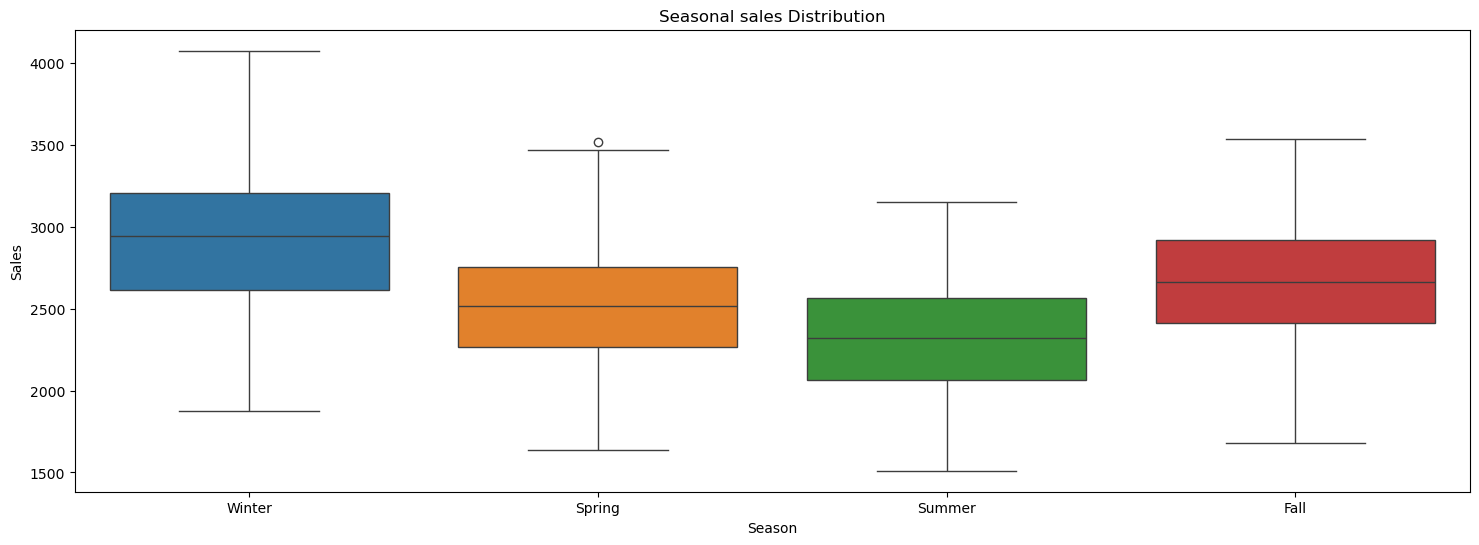

In [98]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Season',y='Sales',hue='Season',data=df)
plt.title("Seasonal sales Distribution")
plt.show()

>Insights:Winter sees the highest sales while summer sees the lowest

In [34]:
#### Correlation Analysis
numeric_data=df.select_dtypes(include='number')

In [35]:
numeric_data.head()

,Advertising,Discount,Year,Sales,Customer_Count,Profit
0,1275.18,15.74,2022,2679.56,95,652.90
1,1893.89,24.74,2022,3859.05,147,924.16
2,727.38,8.46,2022,2450.71,79,512.75
3,1757.23,15.37,2022,3056.75,97,624.60
4,1507.46,16.22,2022,2840.15,116,617.43


In [36]:
correlation=numeric_data.corr()
correlation

,Advertising,Discount,Year,Sales,Customer_Count,Profit
Advertising,1.000000,-0.041544,0.052870,0.596664,-0.032036,0.508804
Discount,-0.041544,1.000000,-0.021071,0.276811,0.989094,0.223716
Year,0.052870,-0.021071,1.000000,-0.021249,-0.037677,0.006903
Sales,0.596664,0.276811,-0.021249,1.000000,0.309698,0.861604
Customer_Count,-0.032036,0.989094,-0.037677,0.309698,1.000000,0.248441
Profit,0.508804,0.223716,0.006903,0.861604,0.248441,1.000000


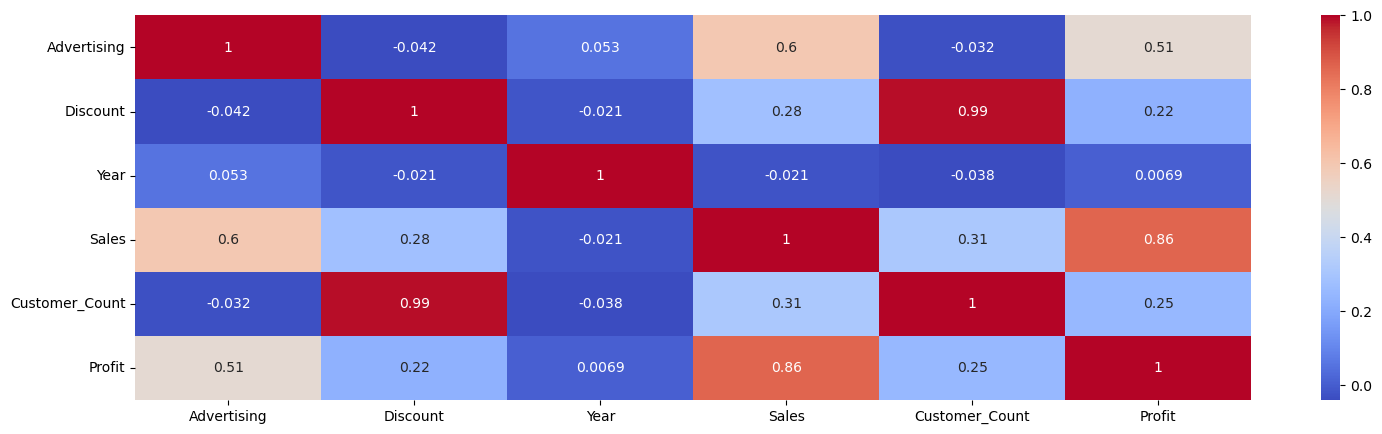

In [37]:
plt.figure(figsize=(18,5))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

>Sales and Profits shows a strong positive correlation,while discounts show weak relationships with profits and sales.Discounts shows a very strong
positive correlation with customer counts indicating discounts attracts customers